# 1. Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import Counter



# 2. Data

In [ ]:


pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (12, 6)  
sns.set_style("whitegrid")  

df = pd.read_csv("/kaggle/input/processed-data/all.csv")


# 3. Overview

In [ ]:

print("-" * 30, "INFO", "-" * 30)
print(df.info())
print("-" * 30, "HEAD", "-" * 30)
print(df.head())
print("-" * 30, "DESCRIBE", "-" * 30)
print(df.describe())

print("-" * 30, "MISSING VALUES", "-" * 30)
print(df.isnull().sum())


# 4. Analyze the data columns"


------------------------------ TITLE ------------------------------
Total number of movies: 1000
Number of unique movies: 923

Top 10 most frequent movies:
Title
Spider-Man: No Way Home           3
Hocus Pocus                       3
The Nightmare Before Christmas    3
House of Gucci                    2
Puss in Boots: The Last Wish      2
Violent Night                     2
Venom: Let There Be Carnage       2
Promising Young Woman             2
Jurassic Park                     2
Strange World                     2
Name: count, dtype: int64


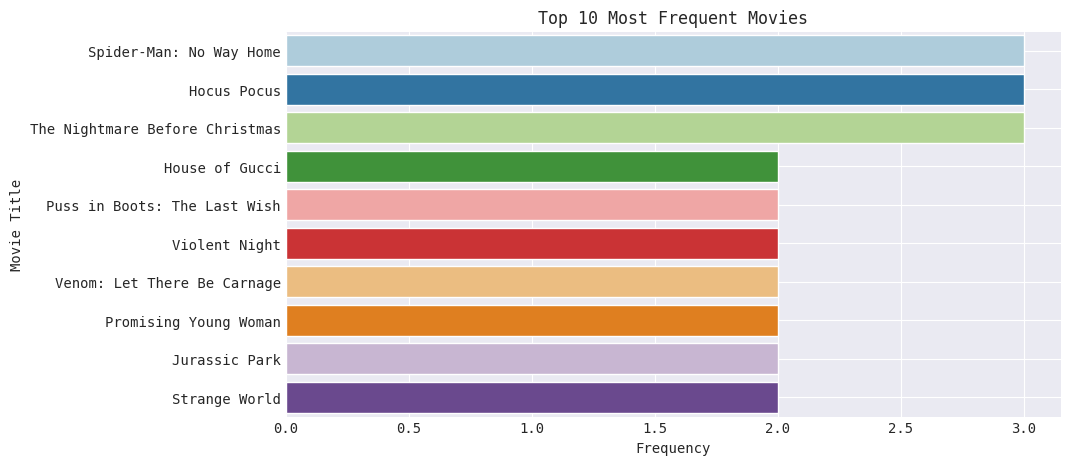

In [58]:
# 4.1 Title
print("-" * 30, "TITLE", "-" * 30)
print(f"Total number of movies: {df['Title'].count()}")
print(f"Number of unique movies: {df['Title'].nunique()}")
print("\nTop 10 most frequent movies:")
top_10_movies = df['Title'].value_counts().head(10)
print(top_10_movies)

# Plotting the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_movies.values, y=top_10_movies.index, palette='Paired')
plt.title('Top 10 Most Frequent Movies')
plt.xlabel('Frequency')
plt.ylabel('Movie Title')
plt.grid(True)
plt.show()


------------------------------ DISTRIBUTOR ------------------------------
Number of distributors: 133

Top 10 distributors:
Distributor
Universal Pictures                     99
Warner Bros.                           66
Walt Disney Studios Motion Pictures    58
Fathom Events                          52
Focus Features                         52
Sony Pictures Releasing                50
Lionsgate                              47
Paramount Pictures                     43
A24                                    39
Neon                                   36
Name: count, dtype: int64


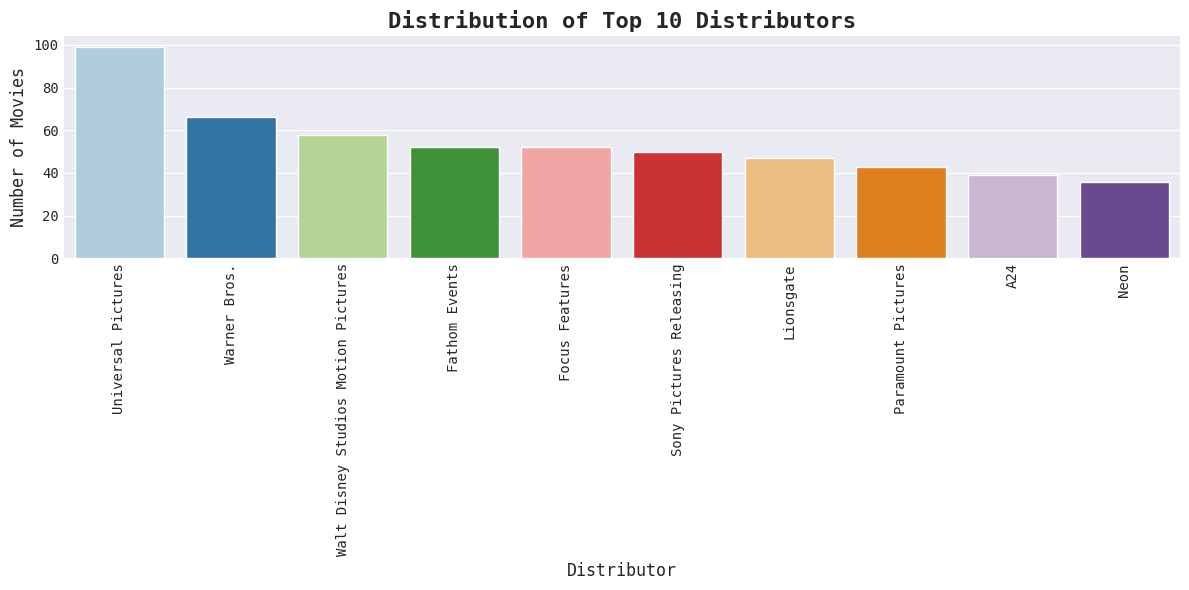

In [61]:
# 4.2 Distributor
print("-" * 30, "DISTRIBUTOR", "-" * 30)
print(f"Number of distributors: {df['Distributor'].nunique()}")
print("\nTop 10 distributors:")
top_10_distributors = df['Distributor'].value_counts().head(10)
print(top_10_distributors)

# Plotting the bar chart for Distributor distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_distributors.index, y=top_10_distributors.values, palette='Paired')
plt.title('Distribution of Top 10 Distributors', fontsize=16, fontweight='bold')
plt.xlabel('Distributor', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

------------------------------ OPENING ------------------------------
count    1000.000000
mean       11.572136
std        27.210035
min         0.003000
25%         0.366250
50%         2.000000
75%        10.250000
max       260.000000
Name: Opening, dtype: float64


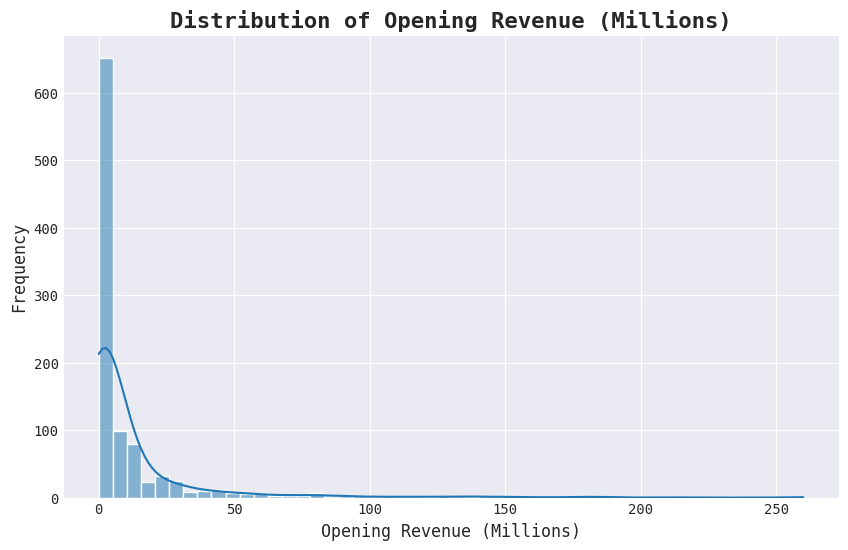

In [63]:
# 4.3 Opening
print("-" * 30, "OPENING", "-" * 30)
print(df['Opening'].describe())

# Plotting the distribution of Opening Revenue
plt.figure(figsize=(10, 6))
sns.histplot(df['Opening'], bins=50, kde=True)
plt.title('Distribution of Opening Revenue (Millions)', fontsize=16, fontweight='bold')
plt.xlabel('Opening Revenue (Millions)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


------------------------------ MPAA ------------------------------
MPAA
R        536
PG-13    309
PG       151
G          4
Name: count, dtype: int64


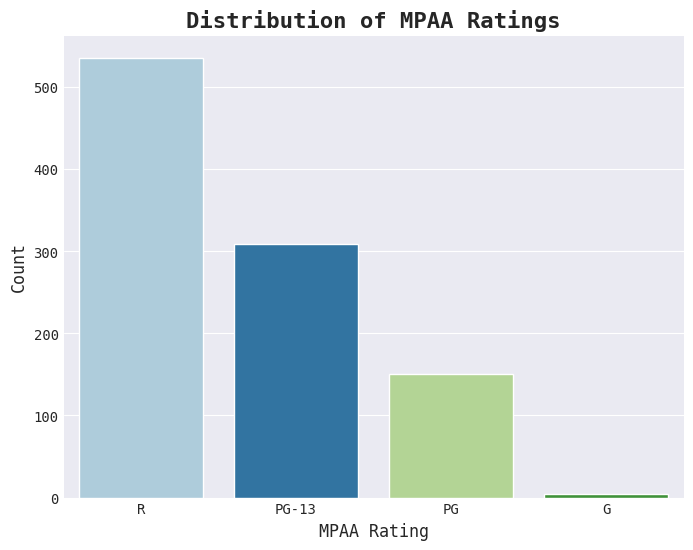

In [65]:
# 4.5 MPAA
print("-" * 30, "MPAA", "-" * 30)
print(df['MPAA'].value_counts())

# Plotting the distribution of MPAA Ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='MPAA', data=df, order=df['MPAA'].value_counts().index, palette='Paired')
plt.title('Distribution of MPAA Ratings', fontsize=16, fontweight='bold')
plt.xlabel('MPAA Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


------------------------------ RUNNING TIME ------------------------------
count    1000.000000
mean      116.474372
std        39.063308
min        53.000000
25%        99.000000
50%       110.000000
75%       127.000000
max      1075.000000
Name: Running Time, dtype: float64


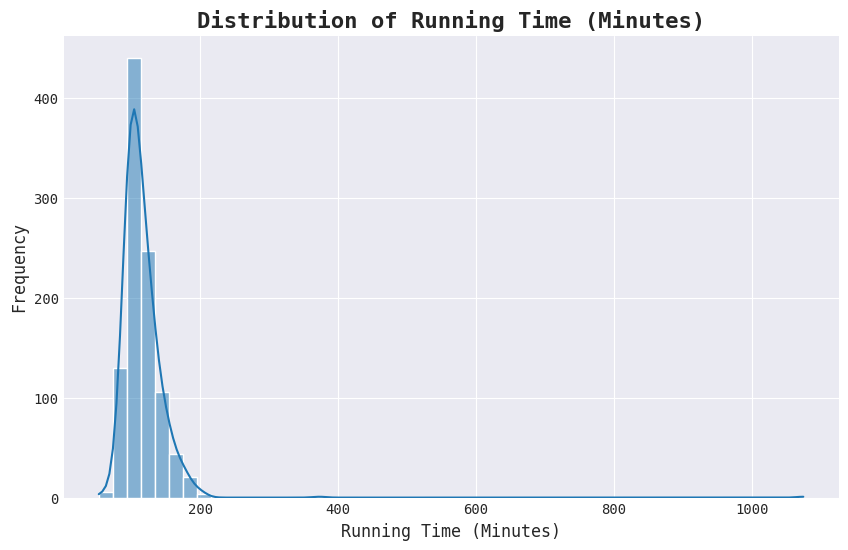

In [66]:
# 4.6 Running Time
print("-" * 30, "RUNNING TIME", "-" * 30)
print(df['Running Time'].describe())

# Plotting the distribution of Running Time
plt.figure(figsize=(10, 6))
sns.histplot(df['Running Time'], bins=50, kde=True, palette='Paired')
plt.title('Distribution of Running Time (Minutes)', fontsize=16, fontweight='bold')
plt.xlabel('Running Time (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

------------------------------ DIRECTOR ------------------------------
Number of directors: 766

Top 10 directors with the most movies:
Director
Steven Spielberg     21
Peter Jackson         5
Ridley Scott          5
Guy Ritchie           5
Hayao Miyazaki        5
Henry Selick          5
Andrew Erwin          4
Kenneth Branagh       4
James Cameron         4
Christopher Nolan     4
Name: count, dtype: int64


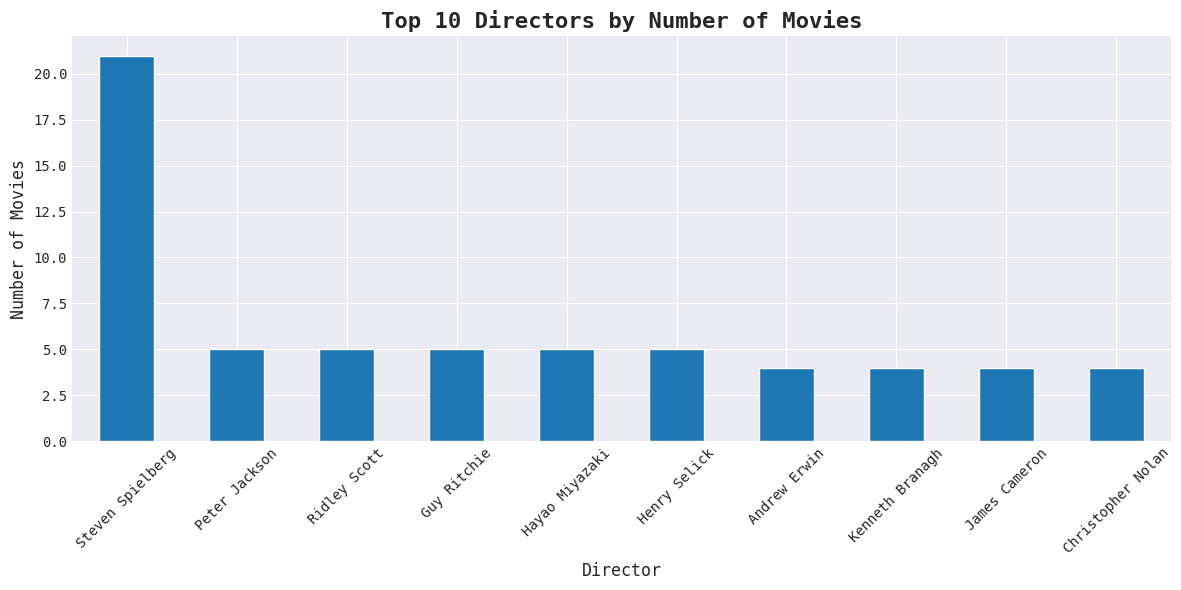

In [70]:
# 4.7 Director
print("-" * 30, "DIRECTOR", "-" * 30)
print(f"Number of directors: {df['Director'].nunique()}")
print("\nTop 10 directors with the most movies:")
print(df['Director'].value_counts().head(10))

# Bar plot for top 10 directors
plt.figure(figsize=(12, 6))
df['Director'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Directors by Number of Movies', fontsize=16, fontweight='bold')
plt.xlabel('Director', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

------------------------------ DOMESTIC, INTERNATIONAL, WORLDWIDE ------------------------------
          Domestic  International    Worldwide
count  1000.000000    1000.000000  1000.000000
mean     37.942799      65.485619    96.155084
std      89.795383     147.640373   231.349864
min       0.043846       0.000079     0.153504
25%       1.436500       1.236000     2.908250
50%       6.128000      15.778500    15.322500
75%      32.206750      65.485619    73.621000
max     804.793000    1636.000000  2320.000000


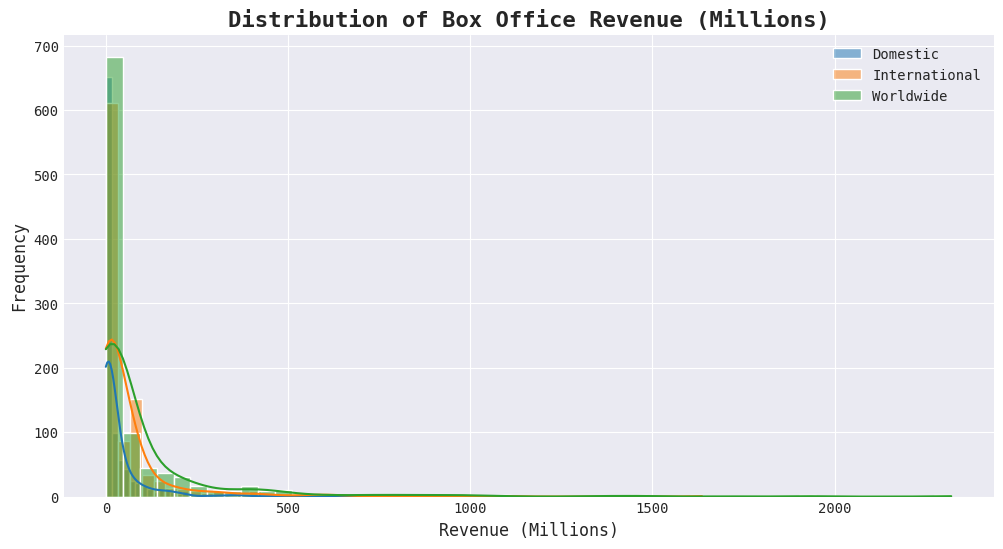

In [71]:
# 4.12 Domestic, International, Worldwide
print("-" * 30, "DOMESTIC, INTERNATIONAL, WORLDWIDE", "-" * 30)
print(df[['Domestic', 'International', 'Worldwide']].describe())

# Biểu đồ phân phối của Domestic, International, Worldwide
plt.figure(figsize=(12, 6))
sns.histplot(df['Domestic'], bins=50, kde=True, label='Domestic')
sns.histplot(df['International'], bins=50, kde=True, label='International')
sns.histplot(df['Worldwide'], bins=50, kde=True, label='Worldwide')
plt.title('Distribution of Box Office Revenue (Millions)', fontsize=16, fontweight='bold')
plt.xlabel('Revenue (Millions)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()


# 5. Analyzing relationships between variables

In [ ]:
# 5.1 Opening vs. Worldwide
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Opening', y='Worldwide', data=df, palette='Paired')
plt.title('Opening Revenue vs. Worldwide Revenue (Millions)', fontsize=16, fontweight='bold')
plt.xlabel('Opening Revenue (Millions)', fontsize=12)
plt.ylabel('Worldwide Revenue (Millions)', fontsize=12)
plt.show()

# 5.2 Running Time vs. Worldwide
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Running Time', y='Worldwide', data=df, palette='Paired')
plt.title('Running Time vs. Worldwide Revenue (Millions)', fontsize=16, fontweight='bold')
plt.xlabel('Running Time (Minutes)', fontsize=12)
plt.ylabel('Worldwide Revenue (Millions)', fontsize=12)
plt.show()

# 5.3 Widest Release vs. Worldwide
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Widest Release', y='Worldwide', data=df, palette='Paired')
plt.title('Widest Release vs. Worldwide Revenue (Millions)', fontsize=16, fontweight='bold')
plt.xlabel('Widest Release (Theaters)', fontsize=12)
plt.ylabel('Worldwide Revenue (Millions)', fontsize=12)
plt.show()

# 5.4 Release Year vs. Worldwide
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Release Date'].dt.year, y='Worldwide', data=df, palette='Paired')
plt.title('Release Year vs. Worldwide Revenue (Millions)', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Worldwide Revenue (Millions)', fontsize=12)
plt.show()

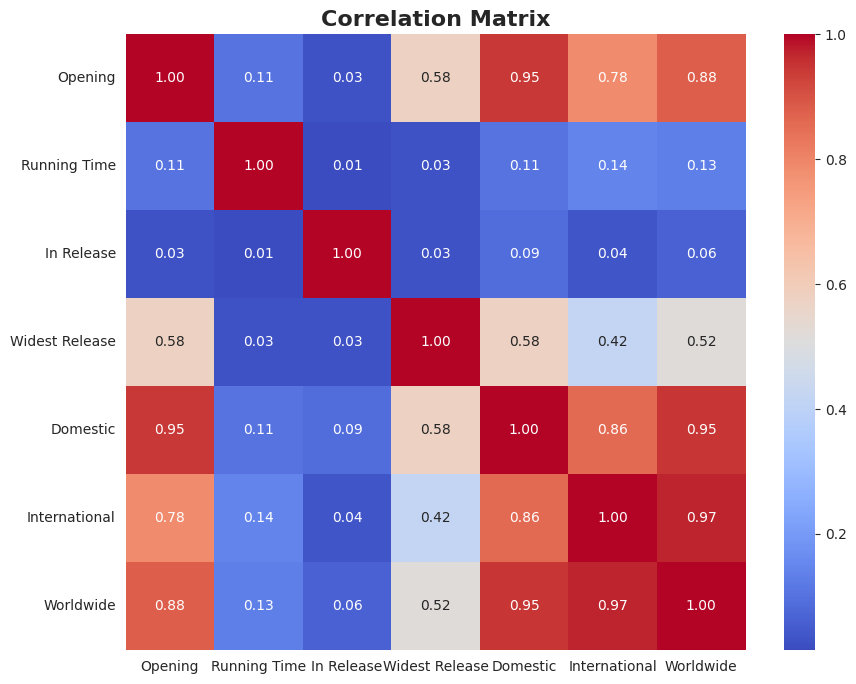

In [40]:
# 5.5 Heatmap

correlation_matrix = df[['Opening', 'Running Time', 'In Release', 'Widest Release', 'Domestic', 'International', 'Worldwide']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.show()

# 6. Genre analysis

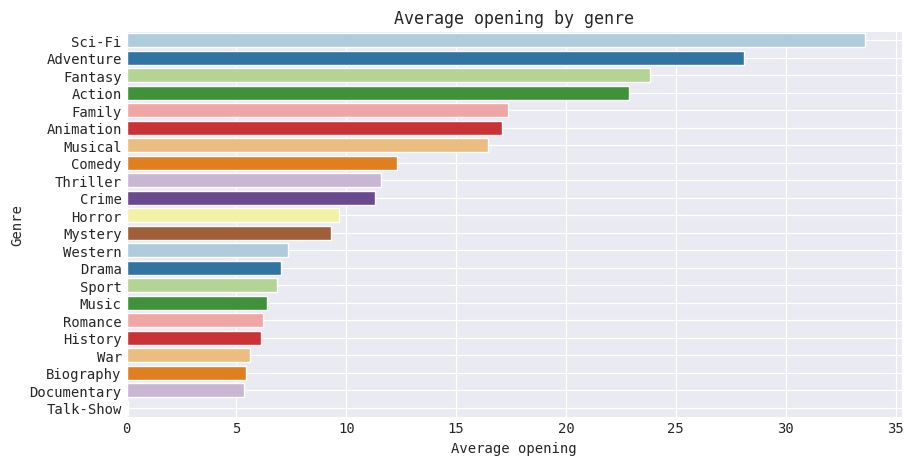

In [78]:
df_movies = pd.read_csv("/kaggle/input/processed-data/all.csv")
df_movies['Genres'] = df_movies['Genres'].fillna("[]")
df_movies['Genres'] = df_movies['Genres'].apply(eval)
genres = df_movies['Genres'].apply(lambda x: x)

genres_list = []
for genre in genres:
  if isinstance(genre, list):
    genres_list.extend(genre)
unique_genres = list(set(genres_list))

genre_rating = {}
for genre in unique_genres:
    genre_rating[genre] = df_movies[df_movies['Genres'].apply(lambda x: genre in x)]['Opening'].mean()

sorted_genre_rating = sorted(genre_rating.items(), key=lambda x: x[1], reverse=True)
genres, ratings = zip(*sorted_genre_rating)

plt.figure(figsize=(10, 5))
sns.barplot(x=np.array(ratings), y=np.array(genres), palette='Paired')
plt.title('Average opening by genre')
plt.xlabel('Average opening')
plt.ylabel('Genre')
plt.grid(True)
plt.show()



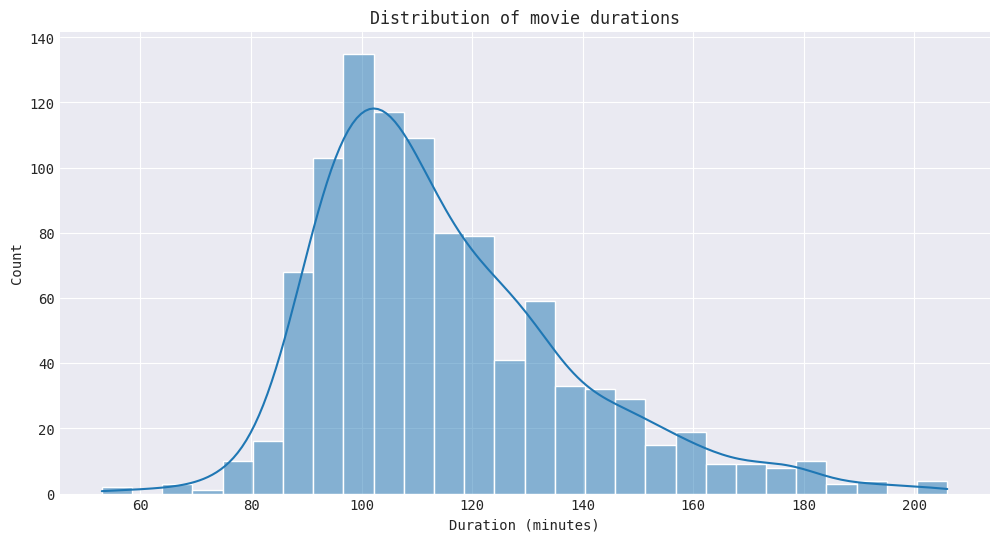

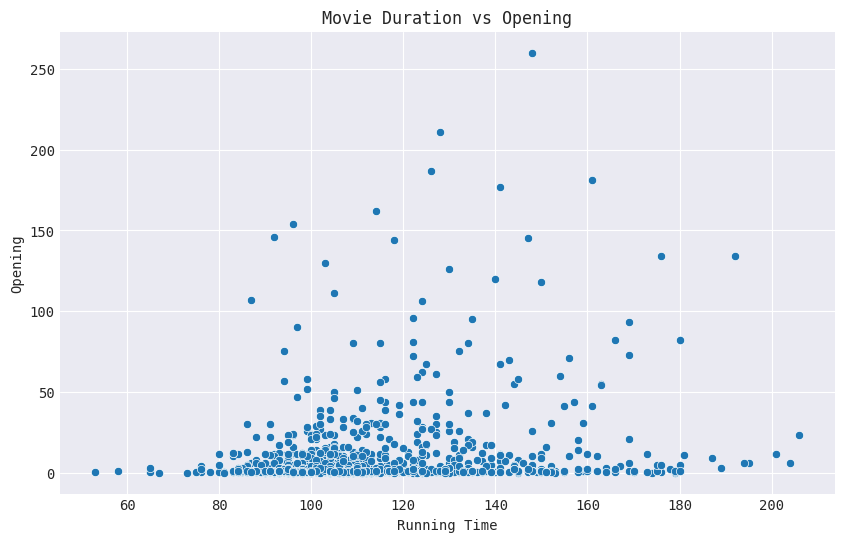

In [79]:

filtered_movies = df_movies[df_movies['Running Time'] < 300]

plt.figure(figsize=(12, 6))
sns.histplot(filtered_movies['Running Time'].dropna(), kde=True, palette='Paired')
plt.title('Distribution of movie durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()


# Duration vs Rating correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_movies, x=filtered_movies['Running Time'], y=filtered_movies['Opening'], palette='Paired')
plt.title('Movie Duration vs Opening')
plt.show()



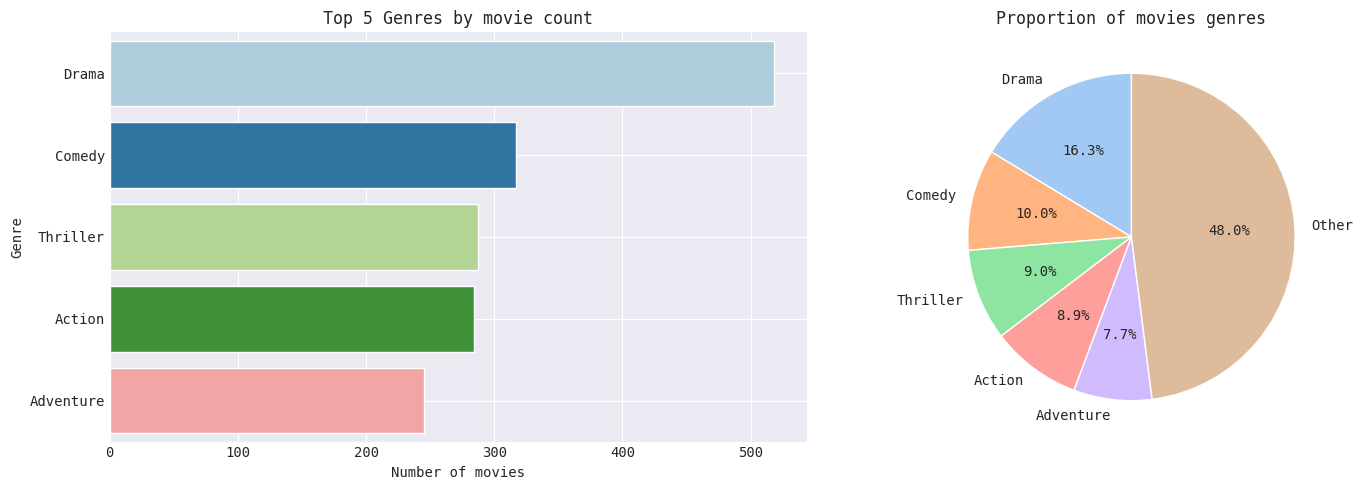

In [81]:


genre_counts = Counter(genres_list)
genre_counts_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

top_genres = genre_counts_df.head(5)
other_genres_count = genre_counts_df['Count'][5:].sum()

other_df = pd.DataFrame({'Genre': ['Other'], 'Count': [other_genres_count]})

top_genres_with_other = pd.concat([top_genres, other_df], ignore_index=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x='Count', y='Genre', data=top_genres, palette='Paired', ax=ax1)
ax1.set_title('Top 5 Genres by movie count')
ax1.set_xlabel('Number of movies')
ax1.set_ylabel('Genre')
ax1.grid(True)

ax2.pie(top_genres_with_other['Count'], labels=top_genres_with_other['Genre'], 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel', len(top_genres_with_other)))
ax2.set_title('Proportion of movies genres')

plt.tight_layout()
plt.show()



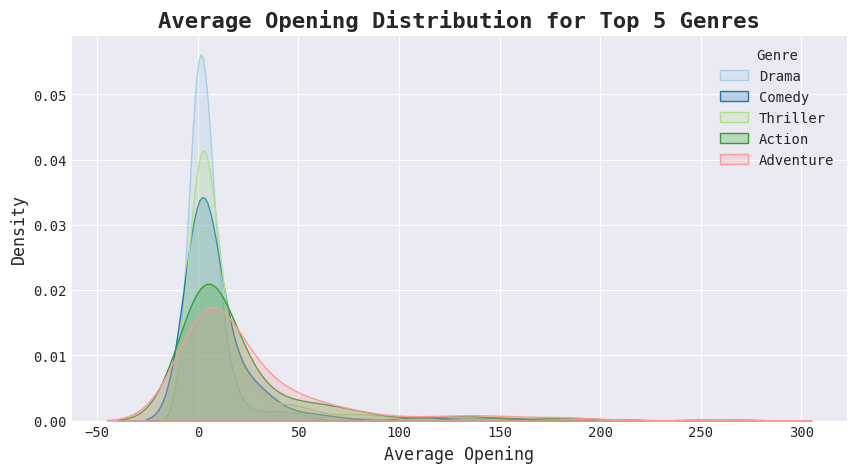

In [84]:
# Average rating distribution for top 5 genres
top_5_genres = list(genre_counts_df.head(5)['Genre'])
plt.figure(figsize=(10, 5))

# Get colors from the 'Paired' palette
colors = sns.color_palette("Paired", n_colors=len(top_5_genres))

# Plot KDE for top 5 genres with Paired colors
for i, genre in enumerate(top_5_genres):
    subset = df_movies[df_movies['Genres'].apply(lambda x: genre in x)]
    sns.kdeplot(subset['Opening'], label=genre, shade=True, color=colors[i])

plt.title('Average Opening Distribution for Top 5 Genres', fontsize=16, fontweight='bold')
plt.xlabel('Average Opening', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Genre')
plt.show()

# 7. Calculate the average revenue by distributor

------------------------------ AVERAGE REVENUE BY DISTRIBUTOR ------------------------------
                                  Distributor  Average Worldwide Revenue
18                               CMC Pictures                 466.655750
1                        20th Century Studios                 390.369500
125  Walt Disney Studios Motion Pictures/IMAX                 350.861000
124       Walt Disney Studios Motion Pictures                 298.636513
126                              Warner Bros.                 224.135127
104                   Sony Pictures Releasing                 213.916460
66                  Metro-Goldwyn-Mayer (MGM)                 171.111500
24                          Columbia Pictures                 168.450594
118                        Universal Pictures                 166.841458
76                         Paramount Pictures                 159.054175
127                 Well Go USA Entertainment                 143.391302
32                   FUNimation

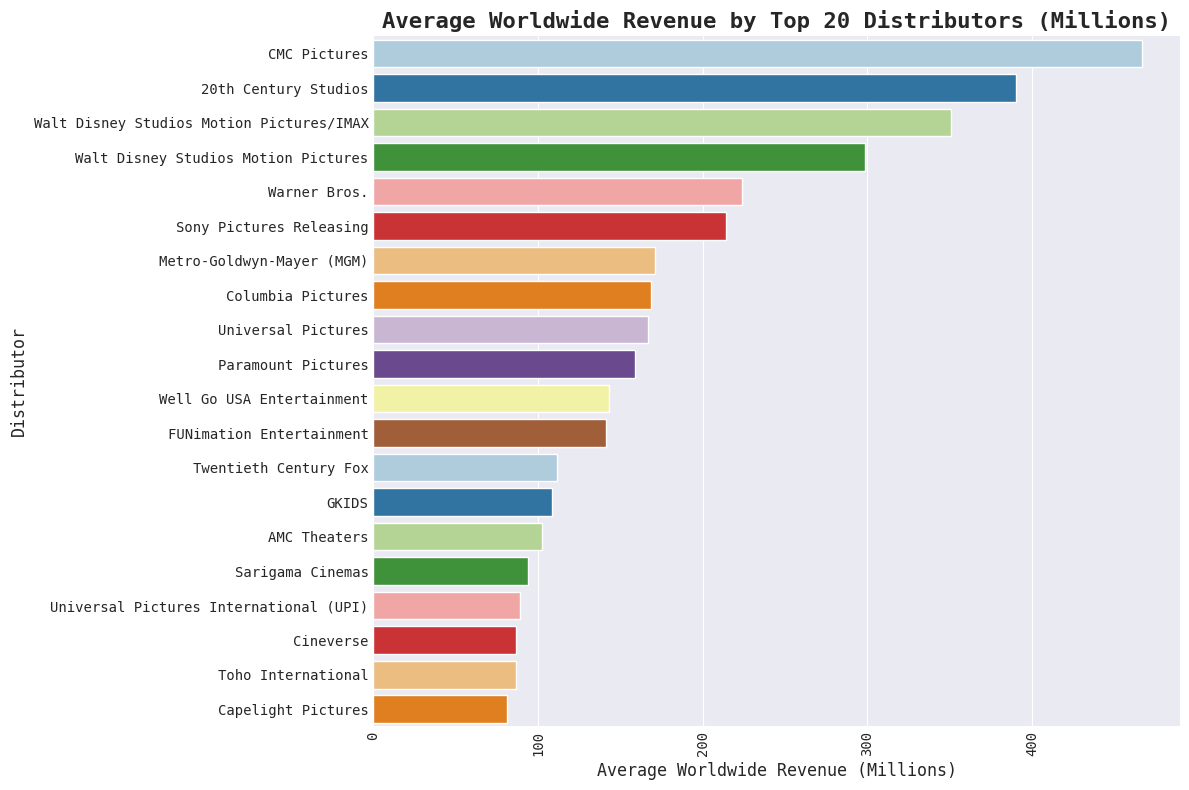

In [89]:
# Calculate the average revenue by distributor
distributor_revenue = df.groupby('Distributor')['Worldwide'].mean().reset_index()
distributor_revenue.columns = ['Distributor', 'Average Worldwide Revenue']

# Sort the DataFrame by average revenue in descending order
distributor_revenue = distributor_revenue.sort_values('Average Worldwide Revenue', ascending=False)

# Print the average revenue for each distributor
print("-" * 30, "AVERAGE REVENUE BY DISTRIBUTOR", "-" * 30)
print(distributor_revenue.head(20))  # Only print top 20

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Average Worldwide Revenue', y='Distributor', data=distributor_revenue.head(20), palette='Paired')
plt.title('Average Worldwide Revenue by Top 20 Distributors (Millions)', fontsize=16, fontweight='bold')
plt.xlabel('Average Worldwide Revenue (Millions)', fontsize=12)
plt.ylabel('Distributor', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



# 8. Calculate the average revenue by MPAA rating

------------------------------ AVERAGE REVENUE BY MPAA RATING ------------------------------
  MPAA Rating  Average Worldwide Revenue
2       PG-13                 155.529064
1          PG                 146.775480
3           R                  48.103667
0           G                  37.485000


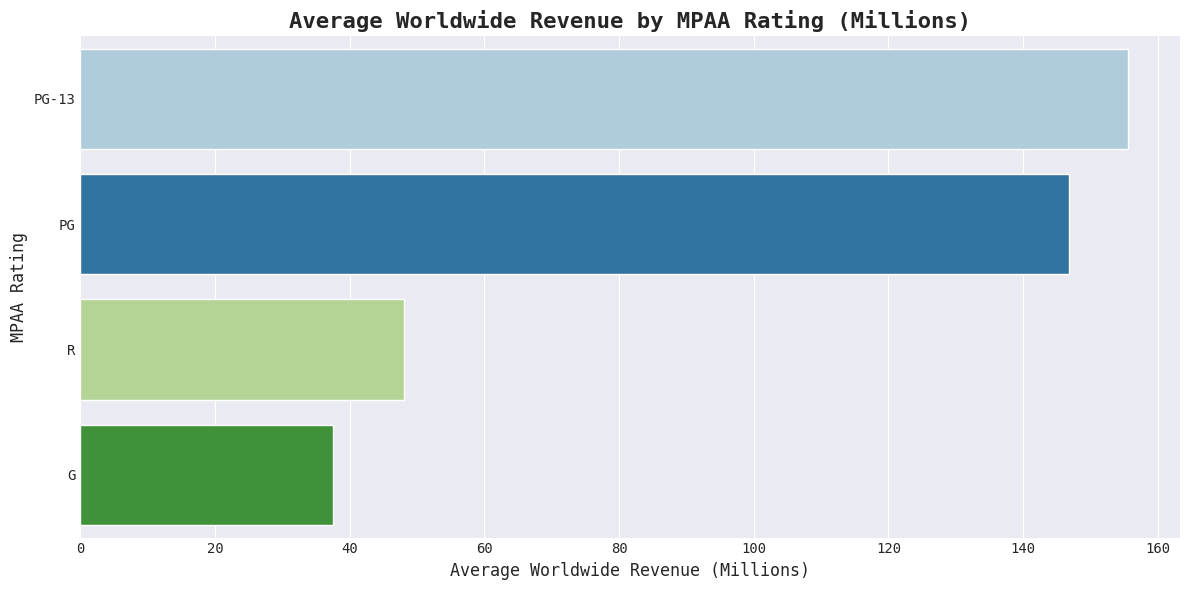

In [88]:
# Calculate the average revenue by MPAA rating
mpaa_revenue = df.groupby('MPAA')['Worldwide'].mean().reset_index()
mpaa_revenue.columns = ['MPAA Rating', 'Average Worldwide Revenue']

# Sort the DataFrame by average revenue in descending order
mpaa_revenue = mpaa_revenue.sort_values('Average Worldwide Revenue', ascending=False)

# Print the average revenue for each MPAA rating
print("-" * 30, "AVERAGE REVENUE BY MPAA RATING", "-" * 30)
print(mpaa_revenue)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Average Worldwide Revenue', y='MPAA Rating', data=mpaa_revenue, palette='Paired')
plt.title('Average Worldwide Revenue by MPAA Rating (Millions)', fontsize=16, fontweight='bold')
plt.xlabel('Average Worldwide Revenue (Millions)', fontsize=12)
plt.ylabel('MPAA Rating', fontsize=12)
plt.tight_layout()
plt.show()